In [ ]:
!pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub

In [ ]:

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [ ]:
# menambah presisi data agar lebih baik (perbandingan side-by-side)
pd.set_option("display.precision", 8)

print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.0.0
Hub version:  0.8.0
Eager mode:  True
GPU is available


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#!unzip -q '/content/gdrive/My Drive/fruit_photos'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_root = '/content/gdrive/My Drive/fruit_photos'

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/gdrive/My Drive/fruit_photos
Found 150 images belonging to 6 classes.
Found 612 images belonging to 6 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Alpukat' 'Anggur' 'Apel' 'Jeruk' 'Pisang' 'Unknown']


# 5 jenis buah memasuki proses latih dengan *Deep learning* (*Convolutional Neural Network*)

## Menambah Model dengan Mobilenet_V2

In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


Potongan Program diatas Mengeksport MobileNet_v2 sebagai arsitektur Deep Learning yang dapat menghandle gambar sebagai modelnya.

## Proses Pelatihan

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=100,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train for 20.0 steps, validate for 5.0 steps
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 35s 2s/step - loss: 1.4528 - acc: 0.4771 - val_loss: 0.7052 - val_acc: 0.7933
Epoch 2/100
20/20 [==============================] - 29s 1s/step - loss: 0.6041 - acc: 0.8072 - val_loss: 0.4533 - val_acc: 0.8667
Epoch 3/100
20/20 [==============================] - 29s 1s/step - loss: 0.3853 - acc: 0.8889 - val_loss: 0.3385 - val_acc: 0.9000
Epoch 4/100
20/20 [==============================] - 29s 1s/step - loss: 0.3088 - acc: 0.9118 - val_loss: 0.2847 - val_acc: 0.9200
Epoch 5/100
20/20 [==============================] - 29s 1s/step - loss: 0.2611 - acc: 0.9183 - val_loss: 0.2684 - val_acc: 0.9067
Epoch 6/100
20/20 [==============================] - 29s 1s/step - loss: 0.2037 - acc: 0.9461 - val_loss: 0.2391 - val_acc: 0.9133
Epoch 7/100
20/20 [==============================] - 29s 1s/step - loss: 0.1650 - acc: 0.9526 - val_loss: 0.2252 - val_acc: 0.9267
Epoch 8/100
20/20 [==============================] - 29s 1s/step - loss: 0.1627 - acc: 0.9575 -

## Evaluasi setelah proses Latih Model

In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Memeriksa Akurasi dan Loss setelah proses latih model
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

['loss', 'acc']
5/5 [==============================] - 4s 742ms/step - loss: 0.2320 - acc: 0.9333
Final loss: 0.23
Final accuracy: 93.33%


## Diagram Hasil Latih Model




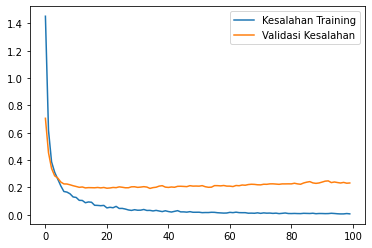

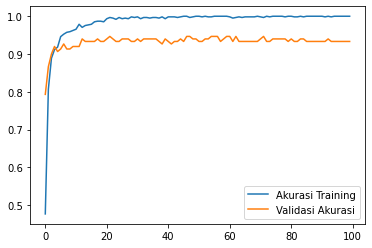

In [ ]:
# Visualisasi training proses dari model

plt.plot(hist["loss"], label="Kesalahan Training")
plt.plot(hist["val_loss"], label="Validasi Kesalahan")
plt.legend()
plt.show()

plt.plot(hist["acc"],label="Akurasi Training")
plt.plot(hist["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

## Eksport Hasil Latih Model ke dalam folder

In [ ]:
FRUIT_SAVED_MODEL = "saved_models/fruit"
tf.keras.experimental.export_saved_model(model, FRUIT_SAVED_MODEL)
fruit_model = tf.keras.experimental.load_from_saved_model(FRUIT_SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: saved_models/fruit/saved_model.pb


INFO:tensorflow:SavedModel written to: saved_models/fruit/saved_model.pb


In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


## Melihat Hasil Prediksi dalam bentuk tabel setelah training

In [ ]:
tf_model_predictions = fruit_model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Alpukat,Anggur,Apel,Jeruk,Pisang,Unknown
0,0.00000007,0.00000015,0.00000065,0.99998915,0.00000014,0.00000989
1,0.00000035,0.00000001,0.00000056,0.99985647,0.00000010,0.00014240
2,0.00000104,0.00004915,0.99763286,0.00000065,0.00000016,0.00231623
3,0.00000920,0.00000244,0.00000084,0.00000006,0.99983549,0.00015201
4,0.00000161,0.00002005,0.00042440,0.98831302,0.00001874,0.01122219


## Prediksi Gambar Secara Acak

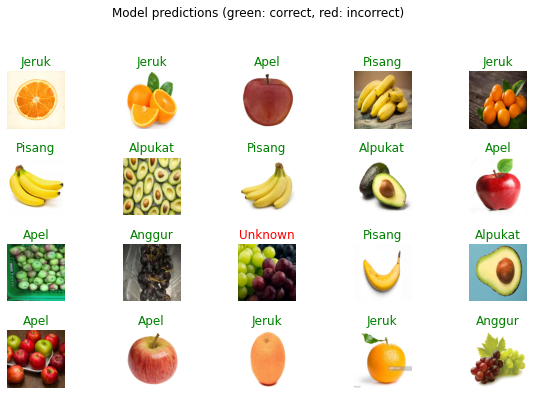

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/fruit.tflite"
#TFLITE_QUANT_MODEL = "tflite_models/fruit_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : fruit_model(x))
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 8.5M
-rw-r--r-- 1 root root 8.5M Jul 29 15:40 fruit.tflite


In [ ]:
# Load TFLite model and see some details about input/output

tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 6]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [32  6]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (32, 6)


In [ ]:
# Concatenate results from all models
#all_models_dataframe = pd.concat([tf_pred_dataframe, 
#                                  tflite_pred_dataframe], 
#                                 keys=['TF Model', 'TFLite'],
#                                 axis='columns')

#all_models_dataframe.head()

In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

#tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
#tflite_pred_dataframe.columns = dataset_labels

#print("TFLite prediction results for the first elements")
#tflite_pred_dataframe.head()

# Concatenate results from all models
#all_models_dataframe = pd.concat([tf_pred_dataframe, 
#                                  tflite_pred_dataframe, 
#                                  tflite_q_pred_dataframe], 
#                                 keys=['TF Model', 'TFLite', 'TFLite quantized'],
#                                 axis='columns')

#all_models_dataframe.head()

In [ ]:
# Load quantized TFLite model
#tflite_interpreter_quant = tf.lite.Interpreter(model_path=TFLITE_QUANT_MODEL)

# Learn about its input and output details
#input_details = tflite_interpreter_quant.get_input_details()
#output_details = tflite_interpreter_quant.get_output_details()

# Resize input and output tensors to handle batch of 32 images
#tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
#tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (32, 5))
#tflite_interpreter_quant.allocate_tensors()

#input_details = tflite_interpreter_quant.get_input_details()
#output_details = tflite_interpreter_quant.get_output_details()

#print("== Input details ==")
#print("name:", input_details[0]['name'])
#print("shape:", input_details[0]['shape'])
#print("type:", input_details[0]['dtype'])

#print("\n== Output details ==")
#print("name:", output_details[0]['name'])
#print("shape:", output_details[0]['shape'])
#print("type:", output_details[0]['dtype'])

# Run inference
#tflite_interpreter_quant.set_tensor(input_details[0]['index'], val_image_batch)

#tflite_interpreter_quant.invoke()

#tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
#print("\nPrediction results shape:", tflite_q_model_predictions.shape)

In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

#tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)
#tflite_q_pred_dataframe.columns = dataset_labels

#print("Quantized TFLite model prediction results for the first elements")
#tflite_q_pred_dataframe.head()

In [ ]:
# Swap columns to hava side by side comparison

#all_models_dataframe = all_models_dataframe.swaplevel(axis='columns')[tflite_pred_dataframe.columns]
#all_models_dataframe.head()